<a href="https://colab.research.google.com/github/ishriana/Projects/blob/main/Oil_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [86]:
df = pd.read_csv('/content/Crude_All.csv')

In [87]:
df['Date'] = pd.to_datetime(df['Date'], format= '%Y-%m-%d')

In [88]:
df['Weekdays'] = df['Date'].dt.day_name()

In [89]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Weekdays
0,2000-08-23,31.950001,32.799999,31.950001,32.049999,32.049999,79385.0,Wednesday
1,2000-08-24,31.900000,32.240002,31.400000,31.629999,31.629999,72978.0,Thursday
2,2000-08-25,31.700001,32.099998,31.320000,32.049999,32.049999,44601.0,Friday
3,2000-08-28,32.040001,32.919998,31.860001,32.869999,32.869999,46770.0,Monday
4,2000-08-29,32.820000,33.029999,32.560001,32.720001,32.720001,49131.0,Tuesday


In [90]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5.210000e+03
mean,61.808388,62.732770,60.822655,61.809263,61.809263,2.999378e+05
std,25.596566,25.809350,25.356785,25.610364,25.610364,2.218330e+05
min,-14.000000,13.690000,-40.320000,-37.630001,-37.630001,0.000000e+00
25%,42.002502,42.944999,41.200001,41.932500,41.932500,1.094515e+05
50%,58.865000,59.570000,57.810001,58.694999,58.694999,2.568855e+05
75%,81.124998,82.097498,79.765000,81.234999,81.234999,4.009822e+05
max,145.190002,147.270004,142.490005,145.179993,145.179993,2.288230e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5317 entries, 0 to 5316
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5317 non-null   datetime64[ns]
 1   Open       5210 non-null   float64       
 2   High       5210 non-null   float64       
 3   Low        5210 non-null   float64       
 4   Close      5210 non-null   float64       
 5   Adj Close  5210 non-null   float64       
 6   Volume     5210 non-null   float64       
 7   Weekdays   5317 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 332.4+ KB


In [ ]:
df.shape

(5317, 8)

In [ ]:
df.isnull().sum()

Date           0
Open         107
High         107
Low          107
Close        107
Adj Close    107
Volume       107
Weekdays       0
dtype: int64

**Dealing with Missing Values**

We have 107 rows missing entirely with no values in any column of those respective rows. In short 2% of the data is not available.
My approach would be to drop these rows, reason being:
1. mean value of (month/week) is not fitting the variations in prices
2. interpolation again is not suiting as the prices sometimes increase or decrease so forward fill or backward fill would not resolve the problem.

In [ ]:
df = df.dropna()

We have two coloumns which are almost identical.
1. Close
2. Adjacent Close
We will use either of them.

In [ ]:
df.drop('Adj Close', axis=1, inplace=True)

**EDA**

For Exploratory Data Analysis i will be using Pandas Profiling Module.
Inferences shall follow with a few lines of codes:

In [ ]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
#report = ProfileReport(df)

In [ ]:
#report

Above Report gives an in-depth understanding about different values related to our data.
1. Overview and Variables section of the report helps in understanding the statistics of our data
2. Interactions and corelations help us in finding dependencies between different columns
3. but lets try some more graphs to undertsand our data well.

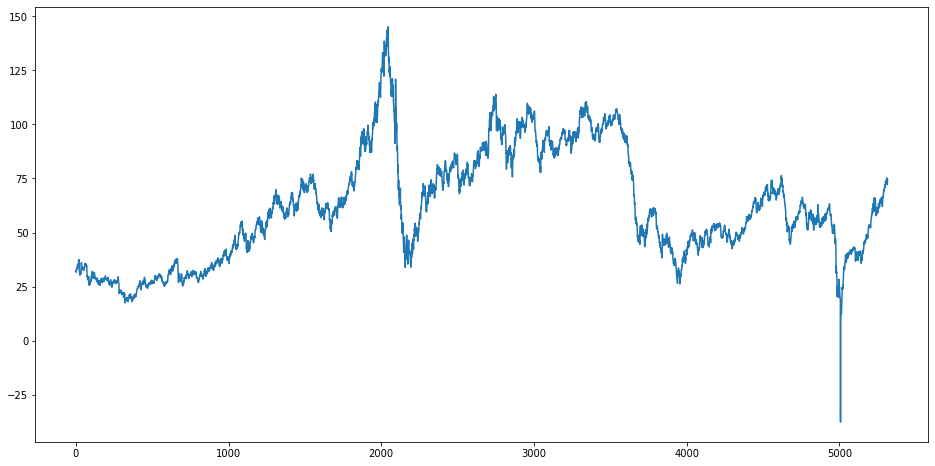

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])

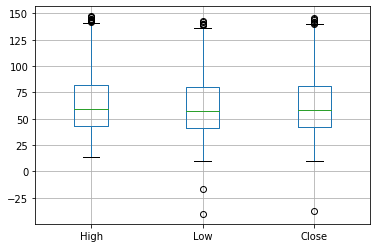

In [ ]:
boxplot = df.boxplot(column = ['High','Low', 'Close'])

In [ ]:
spike_df = df.loc[2010:2057]
lowest_df = df.loc[4990:5020]

**Inferences**

1.Oil prices crossed 100 per barrel after 2008
2. To be precise Feb 2008 marks the onset of this spike 
3. this continued uptil july 2008.
4. 14th July 2008 marks the highest price for oil trade
5. 145.17 per barrel is what that sharp curve denotes in our line plot
6. Whereas the lowest values have been observed in 2020
7. Oil was traded at much lower prices than what it was 20 years back. Amazing isn't it...??? 
8. Lowest value was -37.6 and in the positive slab it was somewhere near 10
9. These max and min values seem like outliers 
10. But i would prefer to keep them in my model as i want my model to learn from highest and lowest prices



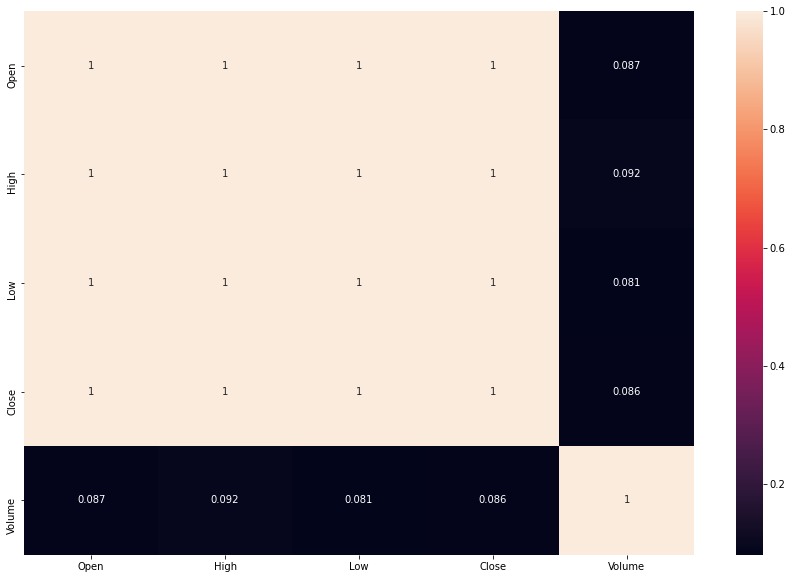

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot= True)

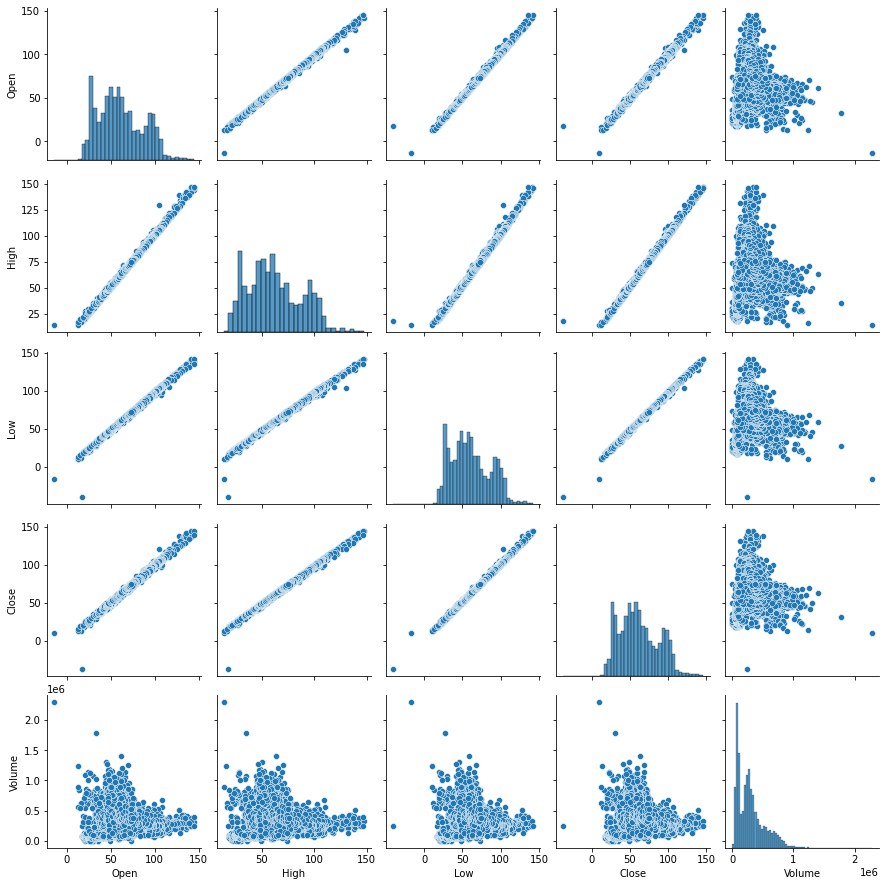

In [ ]:
palette=sns.cubehelix_palette(18, start=2, rot=0, dark=0, light=.95, reverse=False)
sns.pairplot(df)

1. Wow, Suprisingly the co-relation is pretty high.
2. Relations look Linear except for the case of Volume with other features.
2. This would help in feature selection.
3. regardless to say that though features are highly related but in real life we want to know what would be the price without any data-point available (ie: high low or open).
4. its only date factor that should be our input 

**Model Building**

First we will use linear regression to predict the price which uses linear relationship between dependent and independent variables. since we are working on time series data we will split data manually into training and a validation set, but first we will make a new dataframe having only Date and Close columns in it

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Crude_All.csv')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-23,31.950001,32.799999,31.950001,32.049999,32.049999,79385.0
1,2000-08-24,31.900000,32.240002,31.400000,31.629999,31.629999,72978.0
2,2000-08-25,31.700001,32.099998,31.320000,32.049999,32.049999,44601.0
3,2000-08-28,32.040001,32.919998,31.860001,32.869999,32.869999,46770.0
4,2000-08-29,32.820000,33.029999,32.560001,32.720001,32.720001,49131.0


In [ ]:
#df.isnull().sum()
df = df.dropna()

In [ ]:
df1 = df.drop(['High','Open','Low','Volume','Adj Close'], axis=1)
type(df1)

pandas.core.frame.DataFrame

In [ ]:
df1.shape

(5210, 2)

In [ ]:
train = df1[:5200]
valid = df1[5200:]

In [ ]:
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
#y_valid = valid['Close']

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
import datetime as dt
x_valid.columns = ['Date']
x_valid['Date'] = pd.to_datetime(x_valid['Date'])
x_valid['Date']=x_valid['Date'].map(dt.datetime.toordinal)

In [ ]:
pred = reg.predict(x_valid)

In [ ]:
from sklearn.metrics import mean_squared_error
print('mean sq error: {}'. format(mean_squared_error(y_valid,pred)))
print('root mean sq error: {}'.format(np.sqrt(mean_squared_error(y_valid,pred))))

mean sq error: 2973.380505998938
root mean sq error: 54.52871267505715


Rmse is low. but here we need more accurate predictions. model is predicting values far from reality. This is because linear regression model which is fit to time series might/is comparing previous dates and returning predictions equivalent to those dates. we will try other techniques that go along well will time series data

Model 2: KNN regression. Since K-nearest-neighbour uses nearest datapoint to predict the value we can try out a model and check how it performs on this dataset.

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

In [ ]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

In [ ]:
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [ ]:
print('mean sq error: {}'. format(mean_squared_error(y_valid,pred)))
print('root mean sq error: {}'.format(np.sqrt(mean_squared_error(y_valid,pred))))

mean sq error: 2973.380505998938
root mean sq error: 54.52871267505715


No significant change observed. The same problem persists.

Conventional regression models arent performing well on this data, a few reasons which i assume are:
1. data does not have related features as in there is no relation between target variable and independent variable since independent variable is a datetime variable.
2. fitting a datetime variable to a regression line may cause errant predictions which might be due to overlapping numbers in the datetime format with our predicting values.
3. We should explore other techniques in order to resolve the problem in a better way.

In [ ]:
pip install pmdarima

In [3]:
from pmdarima.arima import auto_arima

In [4]:
df = pd.read_csv('/content/Crude_All.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna()
df1 = df.drop(['High','Open','Low','Volume','Adj Close'], axis=1)


In [5]:
df1 = df1.set_index(df1['Date'])

In [6]:
data = df1.sort_index(ascending=True, axis=0)

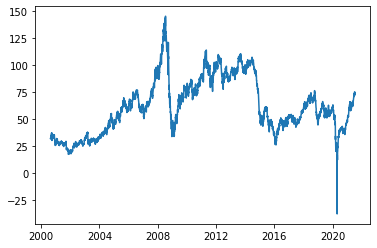

In [7]:
plt.plot(data['Close'])

While using Arima we need to understand certain technicalities in the data which are:
1. Trend does exist but in both upward and downward direction.
2. Seasonality is seen in some parts but not throughout
3. We can conclude this data to be in the form of "White Noise"
4. Hence i assume an average method would suit our predictions as compared to our previous attempts.
5. To keep things simple i will be using auto arima 
6. avg i would consider for the last week,month,year
7. choice depends on what kind of prediction we are making. If i want to predict the price for the next coming day an avg of week or month would serve the purpose
8. If i want to make large number of predictions then a longer duration for averaging would be fine.


In [8]:
train = data[:5200]
valid = data[5200:]

In [9]:
train_feature = train['Close']
valid_feature = valid['Close']

In [10]:
model = auto_arima(train_feature)
model.fit(train_feature)

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [12]:
forecast = model.predict(n_prediods=242)

In [13]:
forecast = pd.DataFrame(forecast, index = valid.index, columns = ['Predictions'])

In [15]:
forecast.head(3)

,Predictions
Date,
2021-06-25,73.256110
2021-06-28,73.251649
2021-06-29,73.251196


In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [17]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Predictions'])),2)))
rms

1.065692194464767

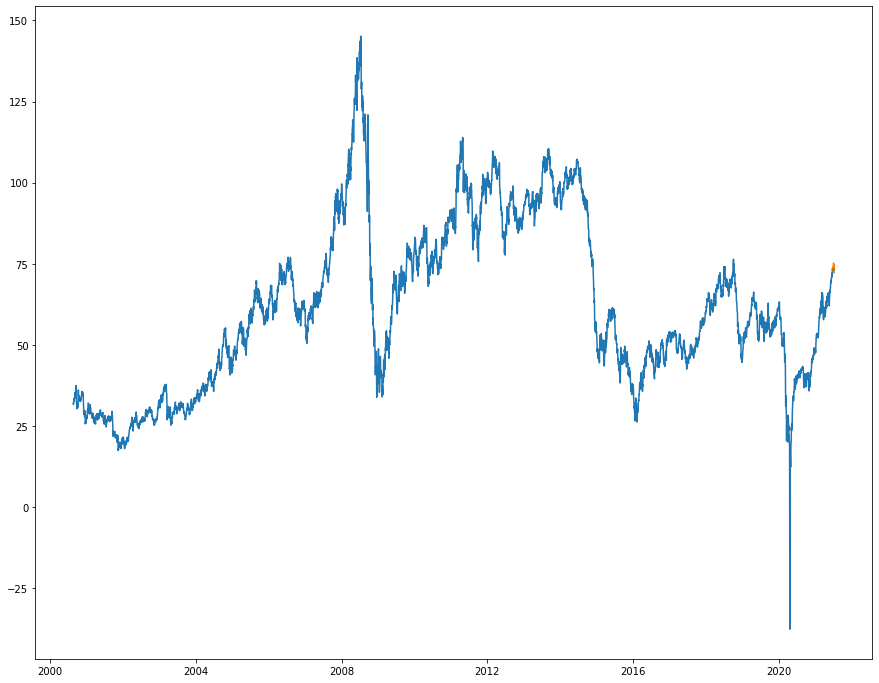

In [ ]:
plt.figure(figsize=(15,12))
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Predictions'])

1. An rmse of 1 is pretty good and we can rely on this score for predicting future prices
2. But the graph isnt speaking much here as we have only 10 predictions
3.Lets see how this model performs for long duration.

In [18]:
train1 = data[:4900]
valid1 = data[4900:]

In [19]:
train1_feature = train1['Close']
valid1_feature = valid1['Close']

In [20]:
model1 = auto_arima(train1_feature)
model1.fit(train1_feature)

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [21]:
forecast1 = model1.predict(n_periods=310)
forecast1 = pd.DataFrame(forecast1, index= valid1.index, columns = ['Predictions1'])

In [22]:
rms1=np.sqrt(np.mean(np.power(np.array(valid1['Close']- np.array(forecast1['Predictions1'])),2)))
rms1

31.75969997806317

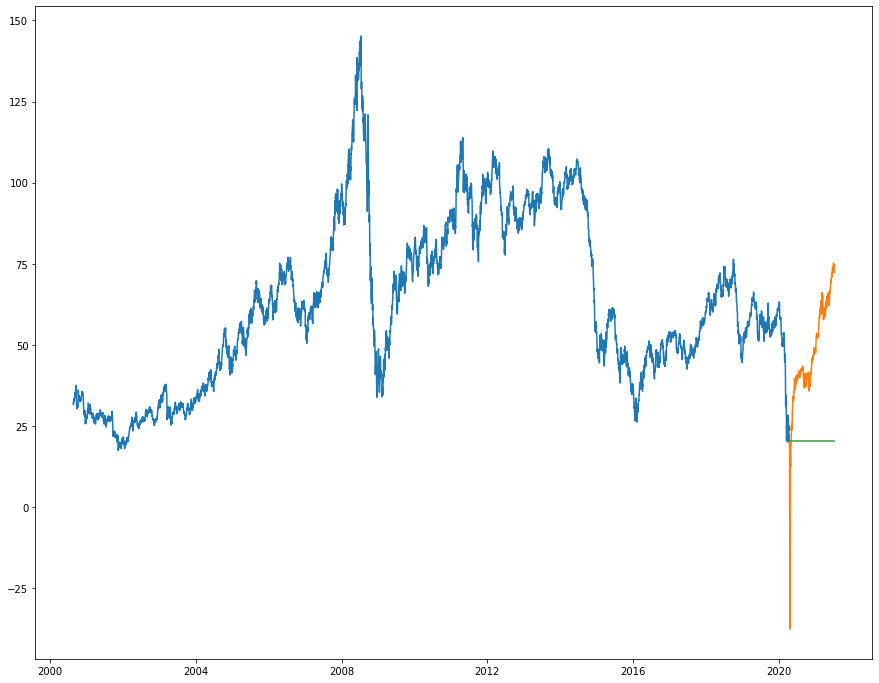

In [23]:
plt.figure(figsize=(15,12))
plt.plot(train1['Close'])
plt.plot(valid1['Close'])
plt.plot(forecast1['Predictions1'])

1. Green Line is our prediction
2. For long durations like for a year or two the model has perfofmed in a poor fashion. 
3. As observed in our case predictions have been differeing way to much from reality because of some inevitable market forces. 
4. As arima relies on previous values (ie: n_periods) for future predictions we can imagine how the pandemic would have affected our model.
5. April 23, 2020 the prices tumbled to negative values. Also nearby values to that data have seen huge uneven movements towards the bottom side of the graph. This was the steapest fall in the history of oil prices and obviously these datapoints which are very close to our prediction values are being used as inputs for predictions. Hence to conclude we can assume this as one of the factors for poor performance of our model. 
6. To add to it, some introspection into the domain reveals that  many factors are involved in deciding market prices and using machine learning alone to predict prices for such long duration wont be a good idea.
7. In my opinion i would rather stick to predicting small term prices rather than going in for long term predictions....

Next we will use fbprophet which is designec and pioneered by Facebook. Prohpet is a forecasting technique used in time series data. It needs two inputs dates and target variable. Also one added advantage that this model has is it works really well on large datasets. Lets see how it serves in our case..!

In [1]:
from fbprophet import Prophet

In [4]:
df = pd.read_csv('/content/Crude_All.csv')
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)), columns=['Date','Close'])

for i in range(0,len(df)):
  new_data['Date'][i] = df['Date'][i]
  new_data['Close'][i]= df['Close'][i]

In [5]:
new_data['Date'] = pd.to_datetime(new_data['Date'])
new_data.index = new_data['Date']

In [6]:
new_data.dropna()

,Date,Close
Date,,
2000-08-23,2000-08-23,32.05
2000-08-24,2000-08-24,31.63
2000-08-25,2000-08-25,32.05
2000-08-28,2000-08-28,32.87
2000-08-29,2000-08-29,32.72
...,...,...
2021-07-02,2021-07-02,75.16
2021-07-06,2021-07-06,73.37
2021-07-07,2021-07-07,72.2


fbprophet requires column names as 'ds' and 'y' for Date and target variable respectively

In [7]:
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

In [76]:
train = new_data[:5200]
valid = new_data[5200:]

In [70]:
len(valid)

217

In [77]:
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [83]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

1. By default the model has disabled daily seasonality and considered monthly and yearly seasonality.
2. next we will create a dataframe with dates for which predictions are to be done.
3. Using model.predict we will predict oil prises for those dates.

In [78]:
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

In [79]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-08-23,32.166895,24.086510,44.389969,32.166895,32.166895,1.847529,1.847529,1.847529,0.235796,0.235796,0.235796,1.611733,1.611733,1.611733,0.0,0.0,0.0,34.014424
1,2000-08-24,32.148357,23.924861,44.336207,32.148357,32.148357,1.873063,1.873063,1.873063,0.244536,0.244536,0.244536,1.628527,1.628527,1.628527,0.0,0.0,0.0,34.021419
2,2000-08-25,32.129818,24.719822,44.380288,32.129818,32.129818,1.866317,1.866317,1.866317,0.220449,0.220449,0.220449,1.645868,1.645868,1.645868,0.0,0.0,0.0,33.996136
3,2000-08-28,32.074203,23.868769,43.712549,32.074203,32.074203,1.886987,1.886987,1.886987,0.194046,0.194046,0.194046,1.692942,1.692942,1.692942,0.0,0.0,0.0,33.961190
4,2000-08-29,32.055664,23.478429,43.701552,32.055664,32.055664,1.891006,1.891006,1.891006,0.186641,0.186641,0.186641,1.704365,1.704365,1.704365,0.0,0.0,0.0,33.946670


In [80]:
forecast.shape

(5317, 19)

In [81]:
forecast_valid = forecast['yhat'][5200:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

18.183167790198535

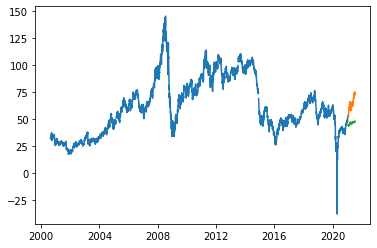

In [82]:
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])


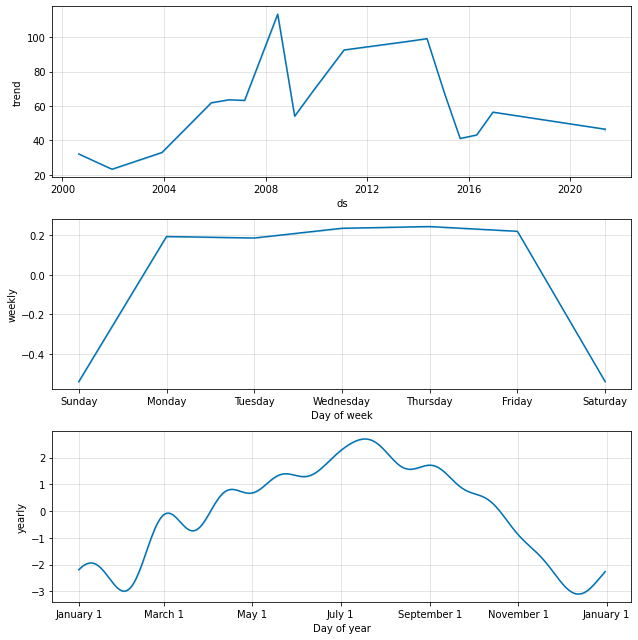

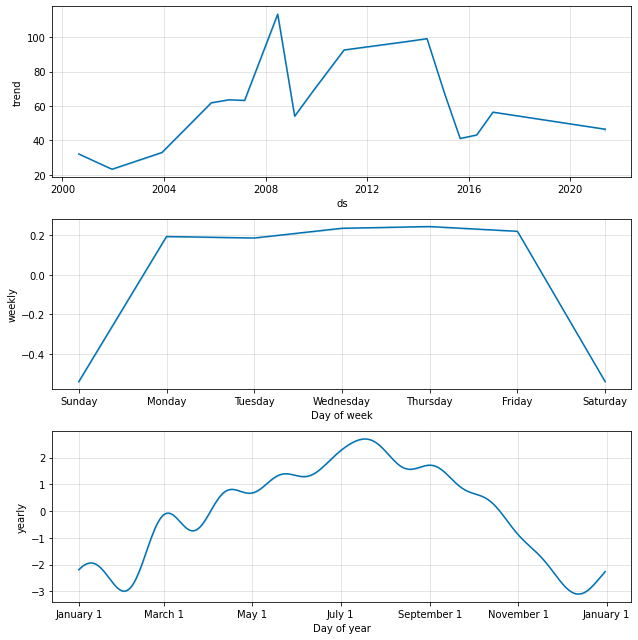

In [84]:
model.plot_components(forecast)

**Inferences from the plot**
1. Trend appears almost in a contorted shape However 2016 onwards it reveals a downward trend but in the average price range ie: between 40-60 (from df.describe we know mean of close is approx 60 and standard deviation approx 25). Hence we can conclude these predictions are pretty reliable and good as well.
2. Yearly predictions graph tells us that prices soar high mid of the year and are lowest at the start and end of the year. This might need some evaluation.

**Conclusion:**

1. Conventional Regression and Classification models are not handy while predicting Datetime series.
2. techniques like Arima Sarima or fbprophet take into consideration movements in values from the previous trends and predict a future point which a normal regression algorithm might not be able to, in a way regression problems fit continious data and datetime models have data which is continiuos and discontinious both.
3. LSTM Model which uses long and short term memory could also serve a good model for such forecasting.
